In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

In [6]:
calories = pd.read_csv('Dataset/calories.csv' ,encoding='latin1')
excercise = pd.read_csv('Dataset/exercise.csv',encoding='latin1')
calories = calories.drop(columns='User_ID') 
combined_df = pd.concat([calories, excercise], axis=1)

combined_df = combined_df.reset_index(drop=True)

combined_df.to_csv('Dataset/combined_data.csv', index=False)

In [9]:
df= pd.read_csv('Dataset/combined_data.csv',encoding='latin1')
df.head()

Calories   User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  \
0     231.0  14733363    male   68   190.0    94.0      29.0       105.0   
1      66.0  14861698  female   20   166.0    60.0      14.0        94.0   
2      26.0  11179863    male   69   179.0    79.0       5.0        88.0   
3      71.0  16180408  female   34   179.0    71.0      13.0       100.0   
4      35.0  17771927  female   27   154.0    58.0      10.0        81.0   

   Body_Temp  
0       40.8  
1       40.3  
2       38.7  
3       40.5  
4       39.8

In [12]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

categorical_cols = df.select_dtypes(include=['object', 'category']).columns
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode())

In [14]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [15]:
x = df.drop(columns='Calories',axis=1)
y = df['Calories']
x.head()


User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0  14733363       1   68   190.0    94.0      29.0       105.0       40.8
1  14861698       0   20   166.0    60.0      14.0        94.0       40.3
2  11179863       1   69   179.0    79.0       5.0        88.0       38.7
3  16180408       0   34   179.0    71.0      13.0       100.0       40.5
4  17771927       0   27   154.0    58.0      10.0        81.0       39.8

In [17]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=42,test_size=0.2)

In [27]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Support Vector Regression": SVR(),
    # "XGBoost": XGBRegressor(),
    # "LightGBM": LGBMRegressor()
}


In [28]:
results = {}
col  = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive']
input_values = []
names = []

C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Ridge was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(
C:\Users\Dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\

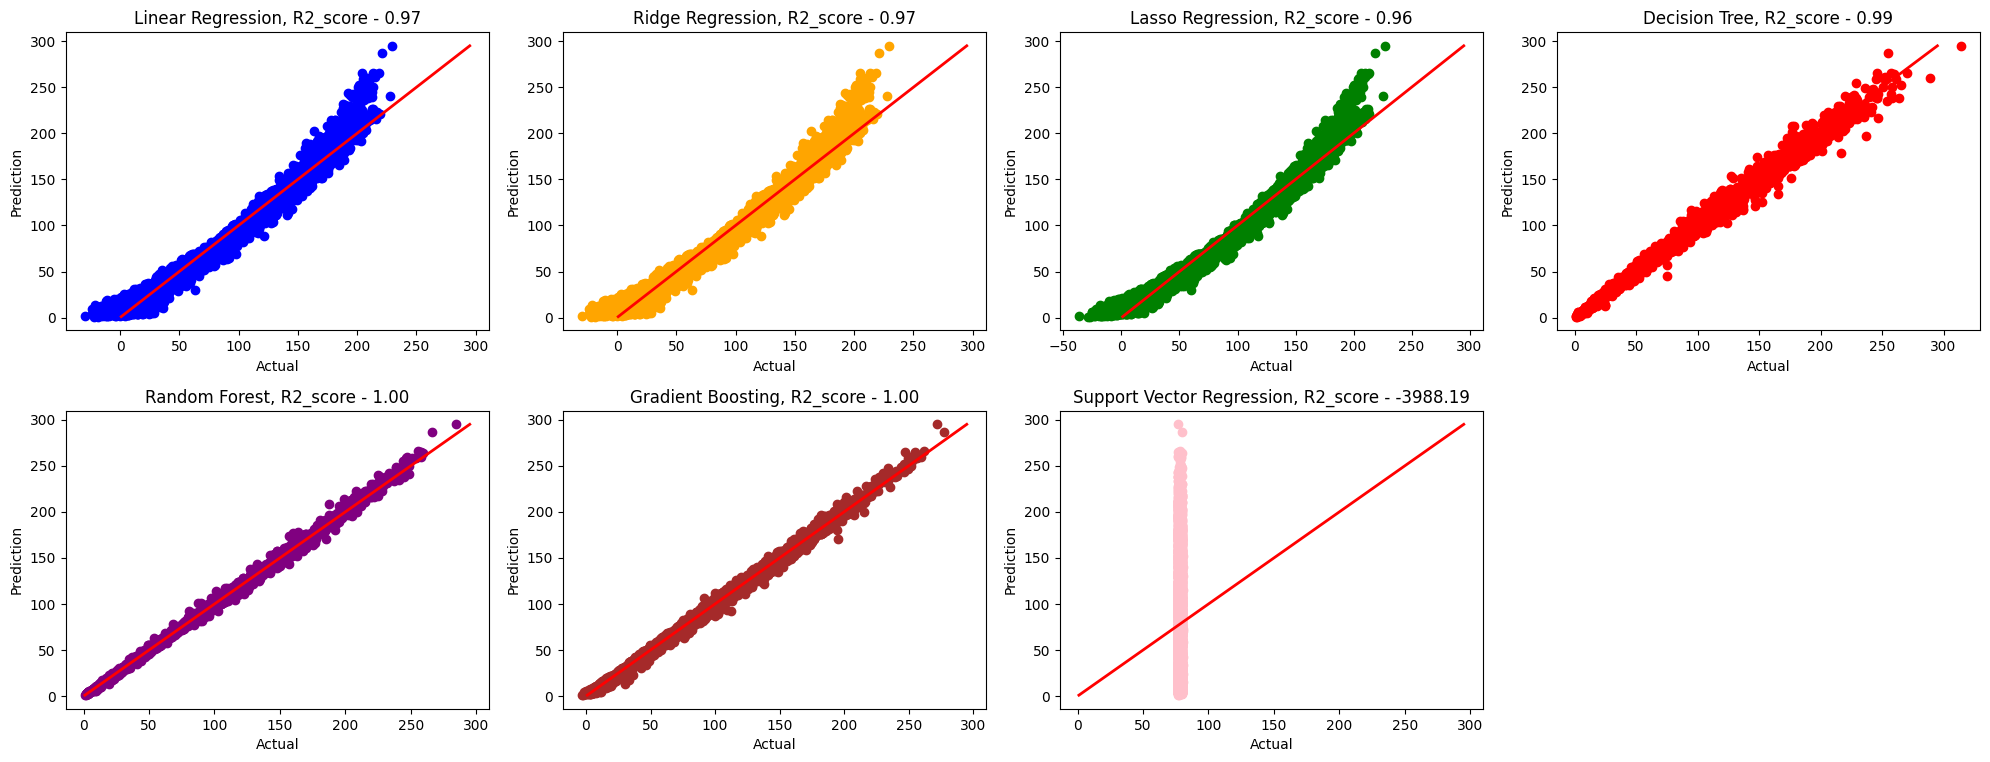

In [29]:
plt.figure(figsize=(20, 30))


for i, (name, model) in enumerate(models.items(), 1):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    mae = mean_absolute_error(y_pred, y_test)
    mse = mean_squared_error(y_pred, y_test)
    r2 = r2_score(y_pred, y_test)

    a = [[14861649,	1	,40,	366.0,	10.0,	34.0,	84.0	,10.3]]

    input_values.append(model.predict(a))
    names.append(name)
    results[name] = {
        'Mean absolute error': mae,
        'Mean square error': mse,
        'R2 score': r2
    }

    plt.subplot(8, 4, i)
    plt.scatter(y_pred, y_test, color=col[i-1])
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
    plt.title(f"{name}, R2_score - {r2:.2f}")
    plt.xlabel("Actual")
    plt.ylabel("Prediction")

plt.tight_layout()
plt.show()

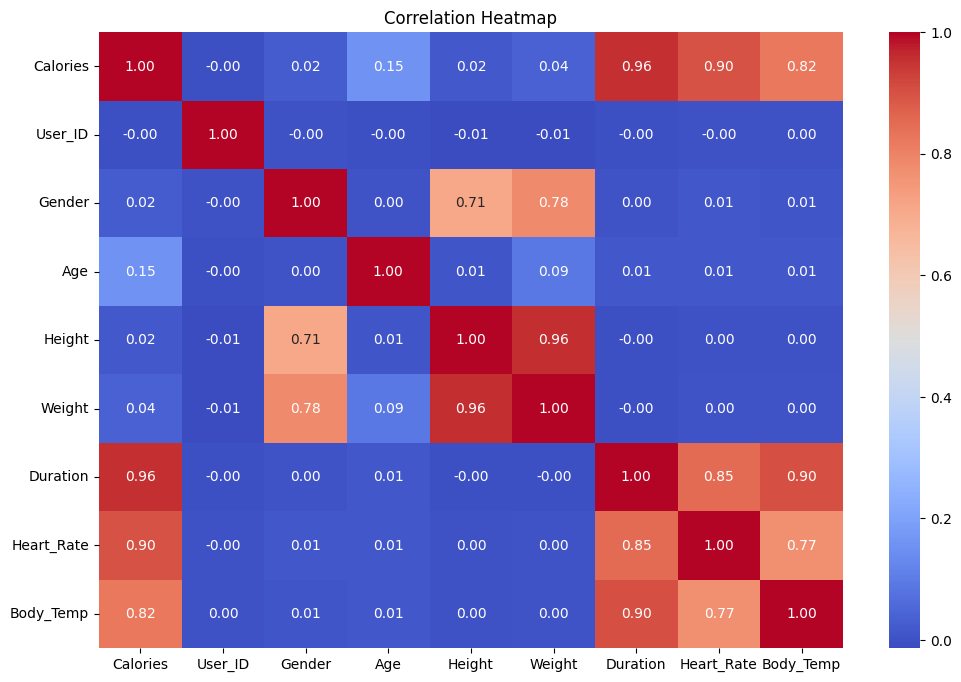

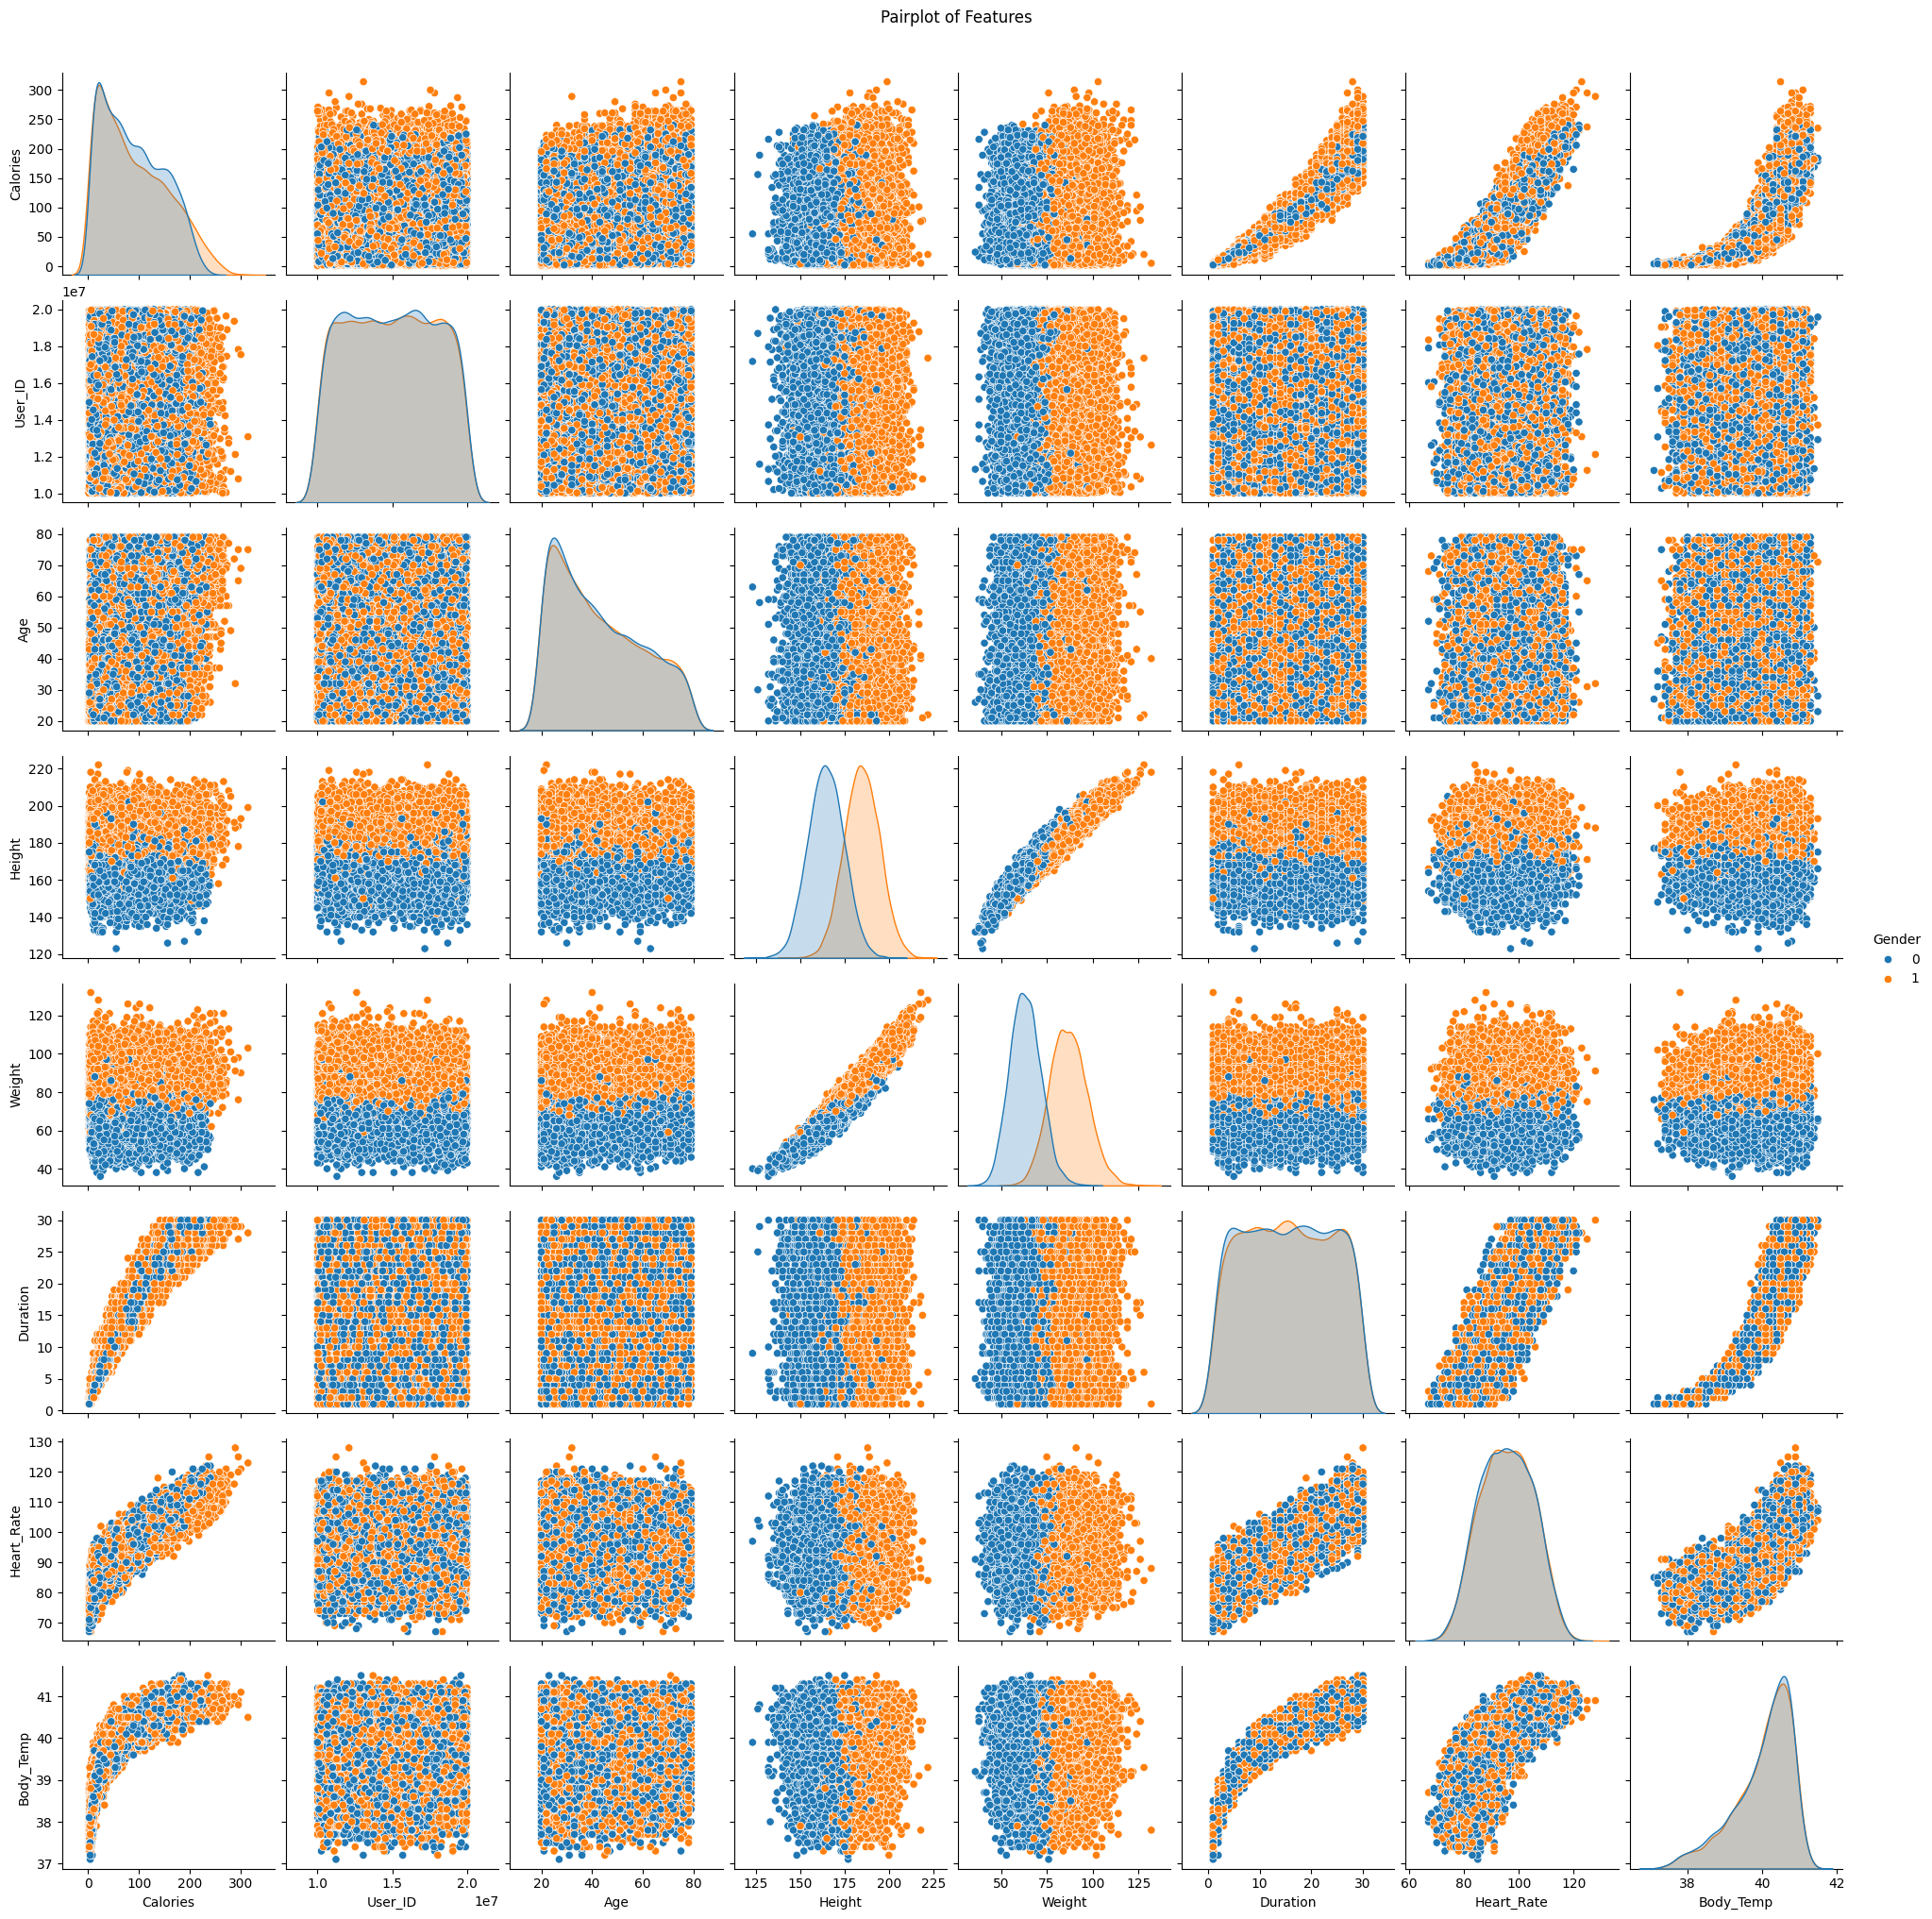

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

sns.pairplot(df, diag_kind='kde', hue='Gender')
plt.suptitle("Pairplot of Features", y=1.02)
plt.show()

In [33]:
result_df = pd.DataFrame(results).T
values = pd.DataFrame(input_values).T
values.columns = names

print(result_df)
print(values)

                           Mean absolute error  Mean square error     R2 score
Linear Regression                     8.443716         132.067582     0.965781
Ridge Regression                      8.443610         132.068139     0.965780
Lasso Regression                      8.869836         143.938529     0.962273
Decision Tree                         3.605667          31.025000     0.992287
Random Forest                         1.809567           7.933449     0.998011
Gradient Boosting                     2.605547          13.047498     0.996738
Support Vector Regression            53.819800        4216.562264 -3988.188470
   Linear Regression  Ridge Regression  Lasso Regression  Decision Tree  \
0         639.471876        639.070143        374.326808          147.0   

   Random Forest  Gradient Boosting  Support Vector Regression  
0         148.39         151.578091                   77.74629  
